loading important libraries

In [41]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn import preprocessing

1-Reviewing the Dataset 

In [42]:
#reading csv file
cust = pd.read_csv(r"C:\Users\Swati Patle\Downloads\Customer_Churn.csv")

In [43]:
# The first 5 observation 
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
# The size of the data set 
cust.shape

(7043, 21)

In [45]:
# Feature information
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
# Descriptive statistics of the data set
cust.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
5%,0.000000,1.000000,19.650000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
90%,1.000000,69.000000,102.600000
95%,1.000000,72.000000,107.400000


In [47]:
# categorical Variables
categorical_variables = [col for col in cust.columns if col in "O"
                        or cust[col].nunique() <=11
                        and col not in "Churn"]
categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [48]:
# Numeric Variables
numeric_variables = [col for col in cust.columns if cust[col].dtype != "object"
                        and cust[col].nunique() >11]
numeric_variables

['tenure', 'MonthlyCharges']

Churn (Dependent Variable)

2- Exploratory Data Analysis (EDA)

In [49]:
# using label encoder for encoding all categorical variables
from sklearn.preprocessing import LabelEncoder
# Converting all object columns
for col in cust.select_dtypes(include=['object']).columns:
    # Example of using Label Encoding for demonstration
    le = LabelEncoder()
    cust[col] = le.fit_transform(cust[col].astype(str))

In [50]:
# Frequency of classes of dependent variable
cust["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Total Charges

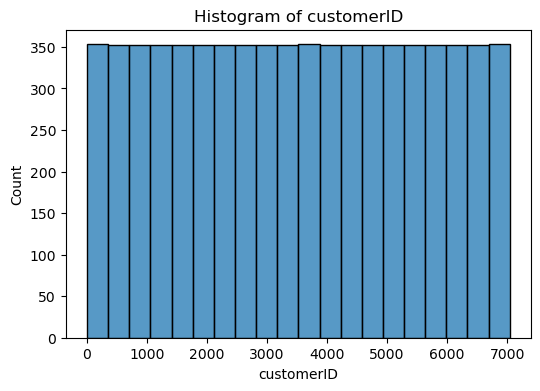

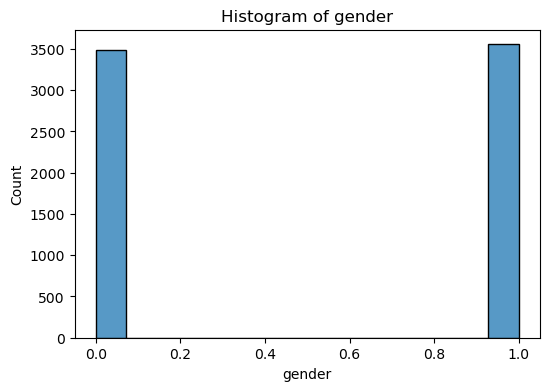

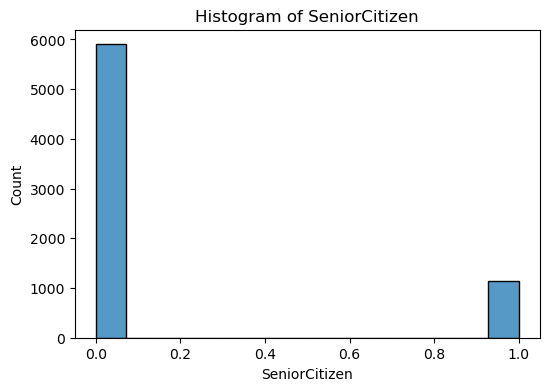

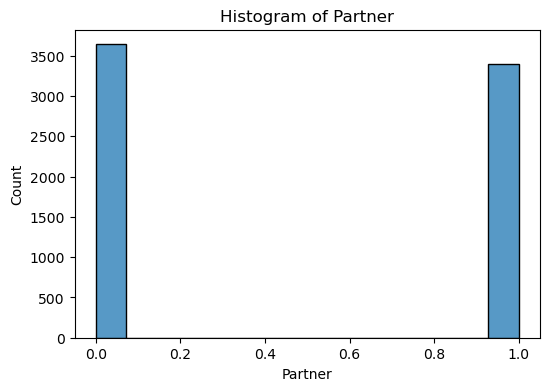

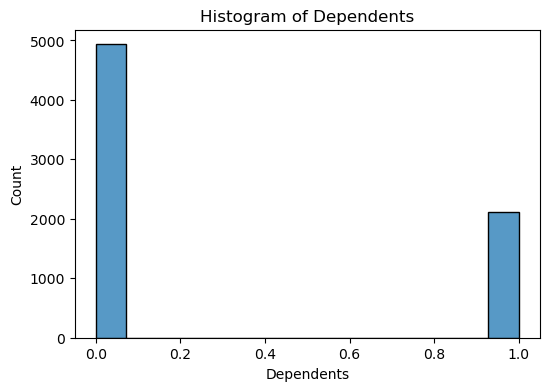

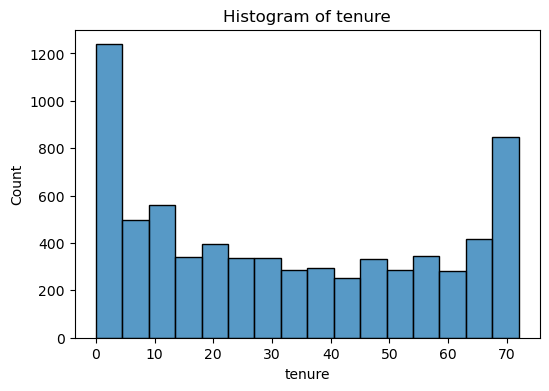

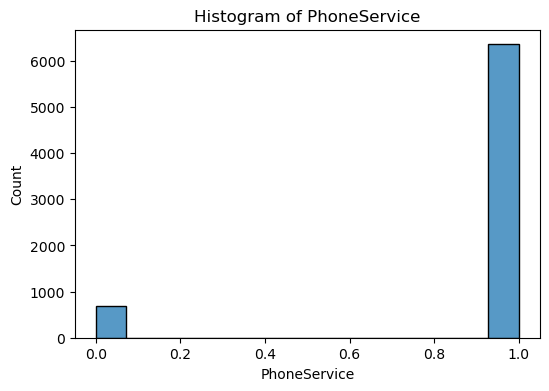

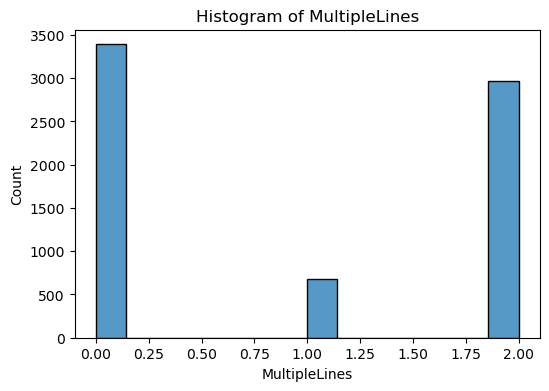

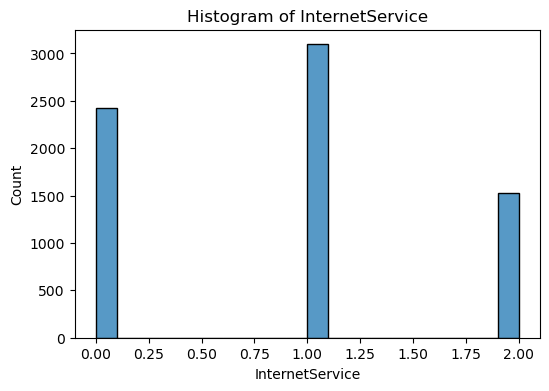

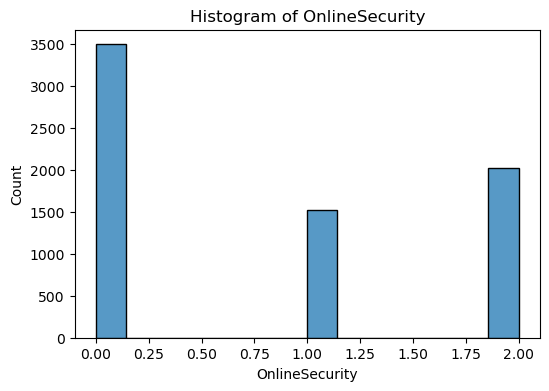

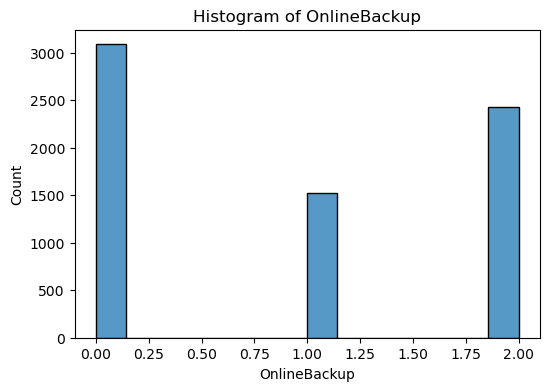

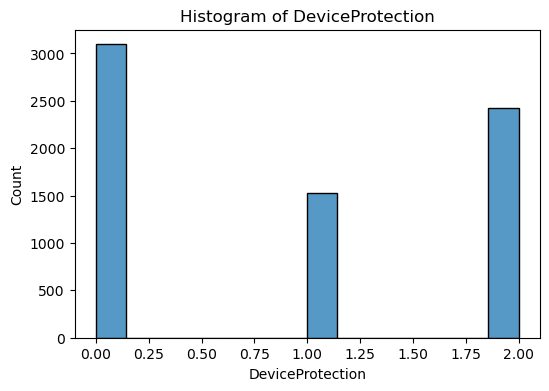

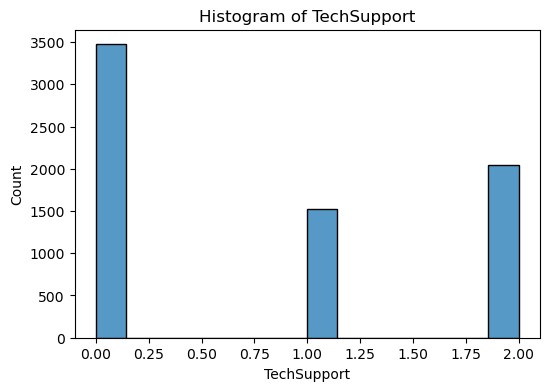

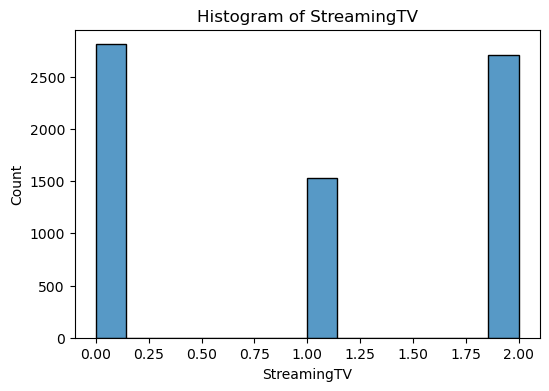

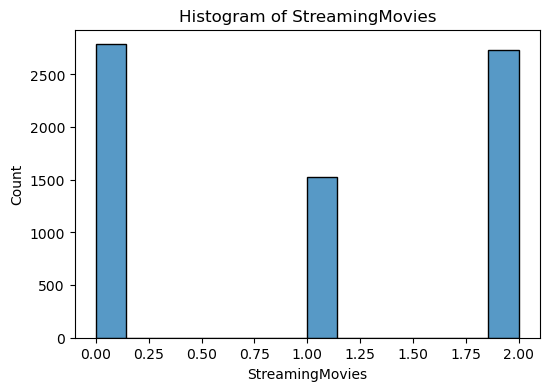

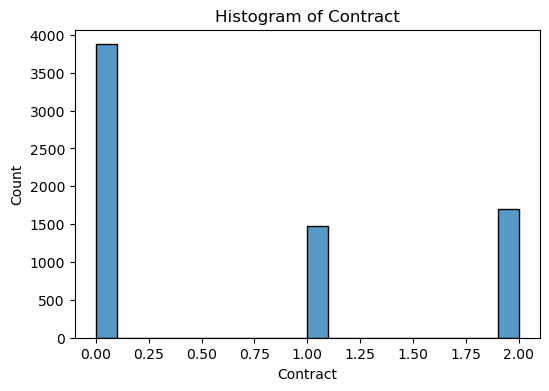

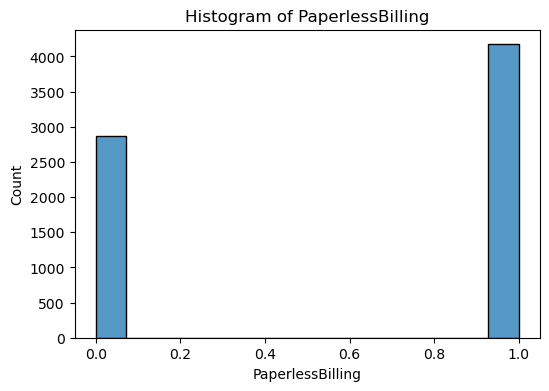

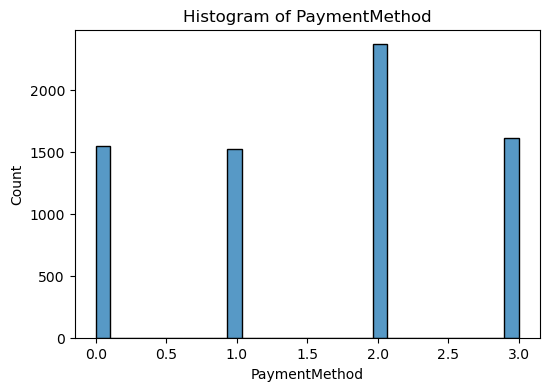

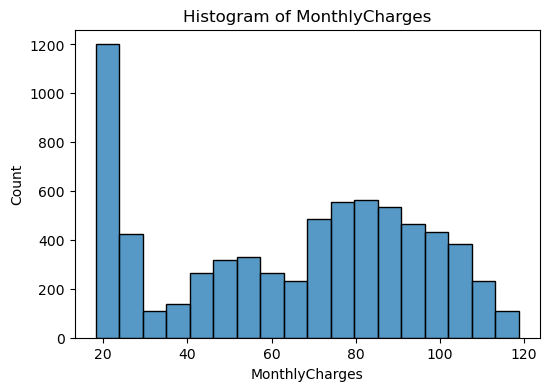

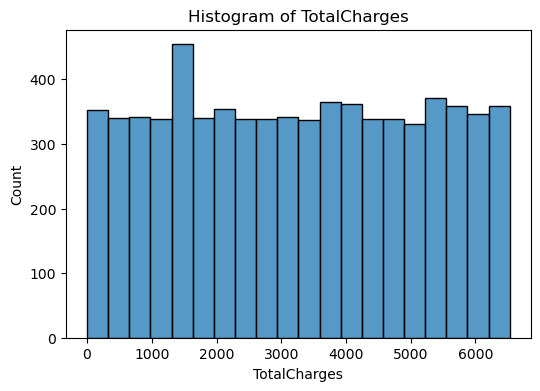

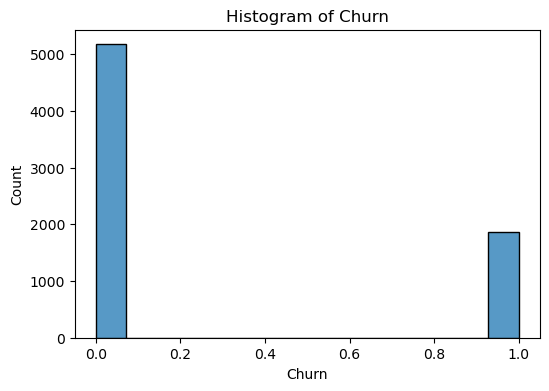

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotting histogram for variables
for i in cust.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(cust[i])
    plt.title(f'Histogram of {i}')
    plt.show()

Correlation Matrix

In [52]:
# churn correlation matrix
corr= cust.corr()
corr.style.background_gradient(cmap='BrBG')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


3- Data Preproccessing

In [53]:
# Missing Observation Analysis
cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
# checking duplicate values in DataFrame
duplicates = cust.duplicated()
print(duplicates.sum())     # Number of duplicated rows
print(cust[duplicates])    # Duplicated rows

0
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [55]:
# Replace 'No internet service' with 'No' in all columns
cust.replace('No internet service', 'No', inplace=True)

deleting unneccessary columns 

In [56]:
cust.drop(["MultipleLines", "customerID","StreamingTV","StreamingMovies","PaperlessBilling","PhoneService","OnlineBackup"],axis=1 , inplace=True)

In [57]:
cust.shape

(7043, 14)

In [58]:
cust.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,0,2,29.85,2505,0
1,1,0,0,0,34,0,2,2,0,1,3,56.95,1466,0
2,1,0,0,0,2,0,2,0,0,0,3,53.85,157,1
3,1,0,0,0,45,0,2,2,2,1,0,42.30,1400,0
4,0,0,0,0,2,1,0,0,0,0,2,70.70,925,1


4-Modeling, 5-Model Evaluation, 6-prediction of churn

In [59]:
# defining values for X and y for training and testing
X = cust.drop("Churn",axis=1)
y = cust["Churn"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [27]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7281760113555713
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1030
           1       0.49      0.49      0.49       379

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



logistic regresion

In [28]:
# Initialize the imputer with desired strategy (e.g., 'mean', 'median', 'most_frequent')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy='mean')
# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)
# Apply the same imputer to your test data
X_test_imputed = imputer.transform(X_test)

In [29]:
# Drop rows with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Update target variable accordingly
# Drop rows with missing values in test set
X_test.dropna(inplace=True)
y_test = y_test[X_test.index] 

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(solver='liblinear')
# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [32]:
# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

In [33]:
# Evaluate the model
from sklearn.metrics import classification_report
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_logreg)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.7849538679914834
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1030
           1       0.62      0.50      0.56       379

    accuracy                           0.78      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



 Random Forest Classifier

In [34]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [35]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [36]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7906316536550745
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1030
           1       0.65      0.49      0.56       379

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [37]:
#displaying confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:",conf_matrix)

Confusion Matrix: [[929 101]
 [194 185]]


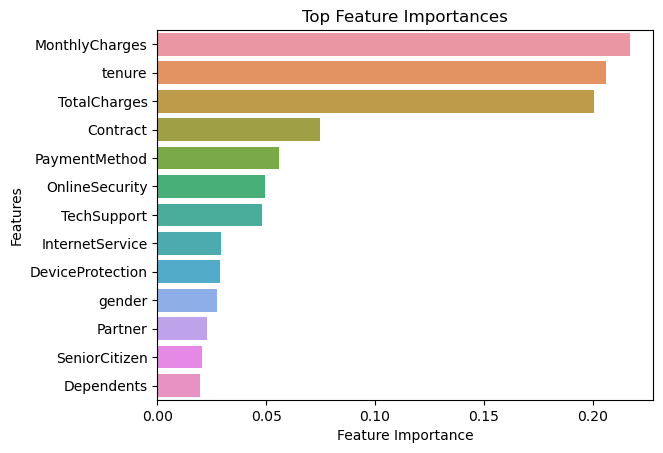

In [38]:
feature_imp = pd.Series(rf.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Feature Importances')
plt.show()

In [39]:
print("Accuracy Decision Tree:", accuracy_dt)
print("Accuracy Logistic Regression:", accuracy_logreg)
print("Accuracy Random Forest:", accuracy_rf)

Accuracy Decision Tree: 0.7281760113555713
Accuracy Logistic Regression: 0.7849538679914834
Accuracy Random Forest: 0.7906316536550745
